In [1]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
from datetime import datetime

# Crear un DataFrame vacío para almacenar los resultados
resultados = pd.DataFrame(columns=['Fecha y Hora de Carga', 'Tipo de vehículo', 'Ocupante', 'Sexo', 'Grupo etario', 'Uso de casco', 'Uso de casco abrochado',
                                   'Uso de chaleco', 'Distractores', 'Adelantamiento indebido'])


# Función para guardar los resultados
def guardar_resultados(b):
    global resultados
    nueva_fila = {'Fecha y Hora de Carga': datetime.now(),
                  'Tipo de vehículo': tipo_vehiculo.value, 'Ocupante': ocupante.value,
                  'Sexo': sexo.value, 'Grupo etario': grupo_etario.value,
                  'Uso de casco': uso_casco.value, 'Uso de casco abrochado': casco_abrochado.value,
                  'Uso de chaleco': uso_chaleco.value, 'Distractores': distractores.value if ocupante.value != 'Conductor' else 'No',
                  'Adelantamiento indebido': adelantamiento_indebido.value if ocupante.value != 'Conductor' else 'No'}
    resultados = pd.concat([resultados, pd.DataFrame([nueva_fila])], ignore_index=True)
    print("Resultados guardados.")
    mostrar_formulario()

# Función para actualizar las opciones del widget 'Uso de casco abrochado' según el widget 'Uso de casco'
def actualizar_opciones_casco_abrochado(change):
    if uso_casco.value == 'No':
        casco_abrochado.value = 'No'
        casco_abrochado.disabled = True
    else:
        casco_abrochado.disabled = False

# Función para actualizar las opciones del widget 'Distractores' según el tipo de ocupante
def actualizar_opciones_distractores(change):
    if ocupante.value == 'Conductor':
        distractores.disabled = False
    else:
        distractores.disabled = True
        distractores.value = 'No'

# Función para actualizar las opciones del widget 'Adelantamiento indebido' según el tipo de ocupante
def actualizar_opciones_adelantamiento(change):
    if ocupante.value == 'Conductor':
        adelantamiento_indebido.disabled = False
    else:
        adelantamiento_indebido.disabled = True
        adelantamiento_indebido.value = 'No'

# Función para actualizar las opciones del widget 'Grupo etario' según el tipo de ocupante
def actualizar_opciones_grupo_etario(change):
    if change.new == 'Conductor':
        grupo_etario.options = ['6 a 11 años', '12 a 17 años', '18 años y más']
    else:
        grupo_etario.options = ['0 a 5 años', '6 a 11 años', '12 a 17 años', '18 años y más']
        grupo_etario.value = '0 a 5 años'  # Establecer el valor predeterminado para no conductor

# Crear un botón de guardar
boton_guardar = widgets.Button(description='Guardar')

# Asociar la función de guardar al botón de guardar
boton_guardar.on_click(guardar_resultados)

# Crear widgets para las variables del formulario
tipo_vehiculo = widgets.ToggleButtons(options=['Moto', 'Motocarro'], description='Tipo de vehículo:')
sexo = widgets.ToggleButtons(options=['Femenino', 'Masculino'], description='Sexo:')
grupo_etario = widgets.ToggleButtons(options=['0 a 5 años', '6 a 11 años', '12 a 17 años', '18 años y más'], description='Grupo etario:')
uso_casco = widgets.ToggleButtons(options=['Sí', 'No'], description='Uso de casco:')
casco_abrochado = widgets.ToggleButtons(options=['Sí', 'No'], description='Uso de casco abrochado:')
uso_chaleco = widgets.ToggleButtons(options=['Sí', 'No'], description='Uso de chaleco:')
distractores = widgets.ToggleButtons(options=['Sí', 'No'], description='Distractores:')
adelantamiento_indebido = widgets.ToggleButtons(options=['Sí', 'No'], description='Adelantamiento indebido:')

# Crear widgets para las ocupaciones
ocupantes = ['Conductor', 'Pasajero 1', 'Pasajero 2', 'Pasajero 3', 'Pasajero 4']
ocupante = widgets.ToggleButtons(options=ocupantes, description='Ocupante')

# Asociar la función de actualización de opciones para 'Grupo etario:'al widget 'Ocupante'
ocupante.observe(actualizar_opciones_grupo_etario, names='value')

# Asociar la función de actualización de opciones para 'Uso de casco abrochado' al widget 'Uso de casco'
uso_casco.observe(actualizar_opciones_casco_abrochado, names='value')

# Asociar la función de actualización de opciones para 'Distractores' al widget 'Ocupante'
ocupante.observe(actualizar_opciones_distractores, names='value')

# Asociar la función de actualización de opciones para 'Adelantamiento indebido' al widget 'Ocupante'
ocupante.observe(actualizar_opciones_adelantamiento, names='value')

# Función para mostrar el formulario
def mostrar_formulario():
    clear_output()
    display(formulario)
    display(boton_guardar)

# Mostrar el formulario inicial
formulario = widgets.VBox([tipo_vehiculo, ocupante, sexo, grupo_etario, uso_casco, casco_abrochado, uso_chaleco, distractores, adelantamiento_indebido])
mostrar_formulario()


Button(description='Guardar', style=ButtonStyle())

In [2]:
print(resultados)

Empty DataFrame
Columns: [Fecha y Hora de Carga, Tipo de vehículo, Ocupante, Sexo, Grupo etario, Uso de casco, Uso de casco abrochado, Uso de chaleco, Distractores, Adelantamiento indebido]
Index: []


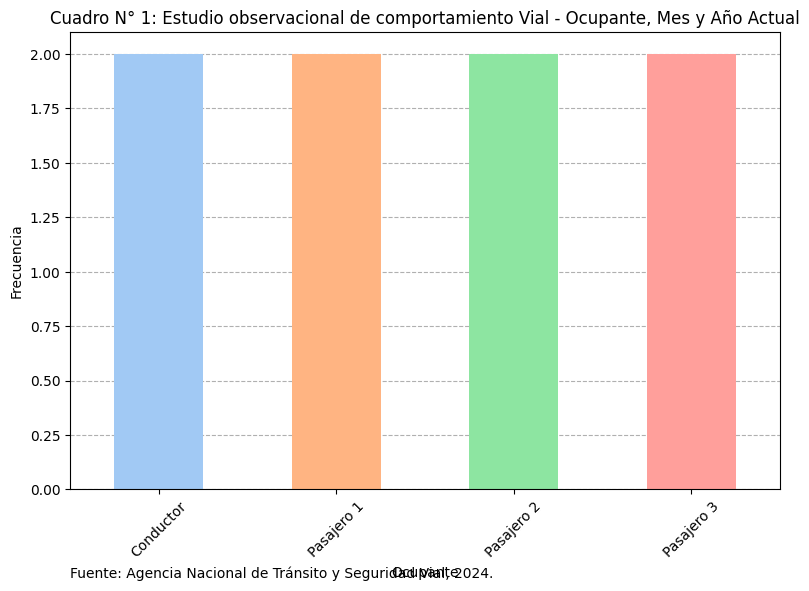

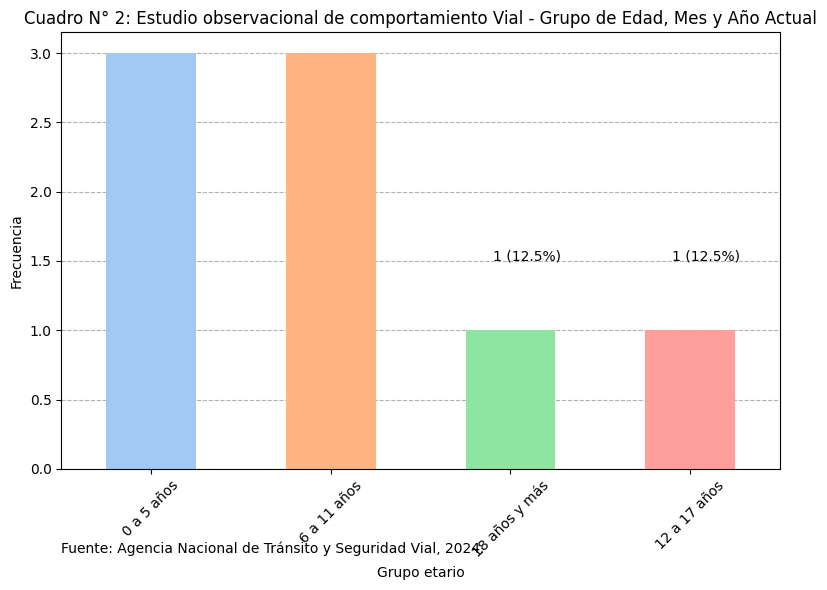

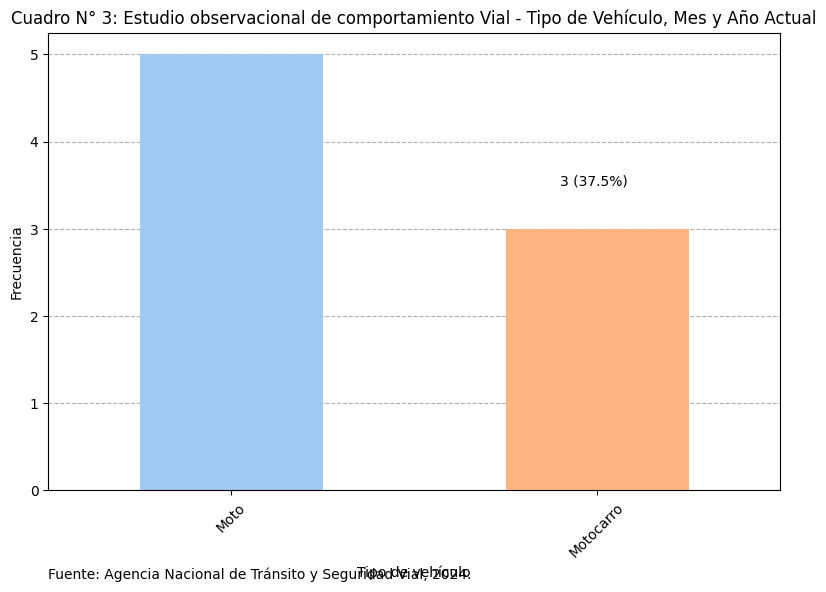

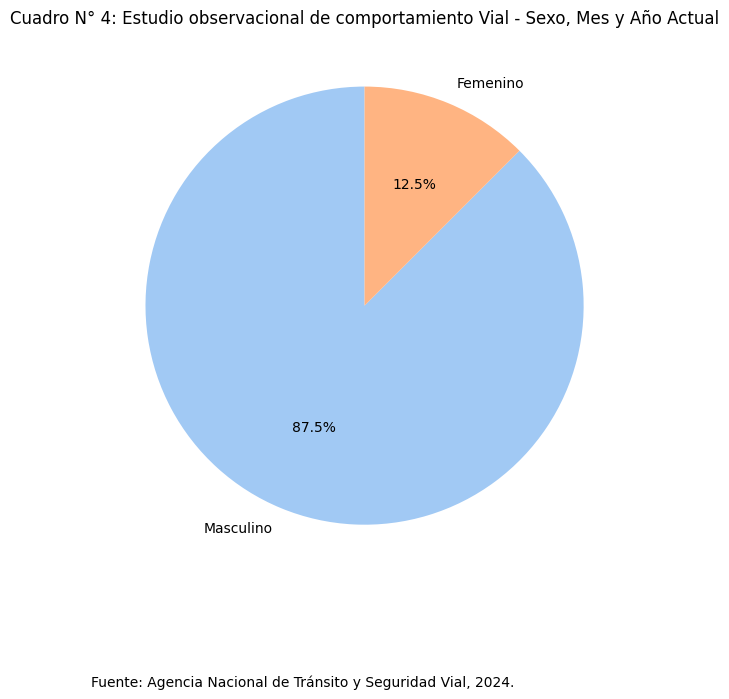

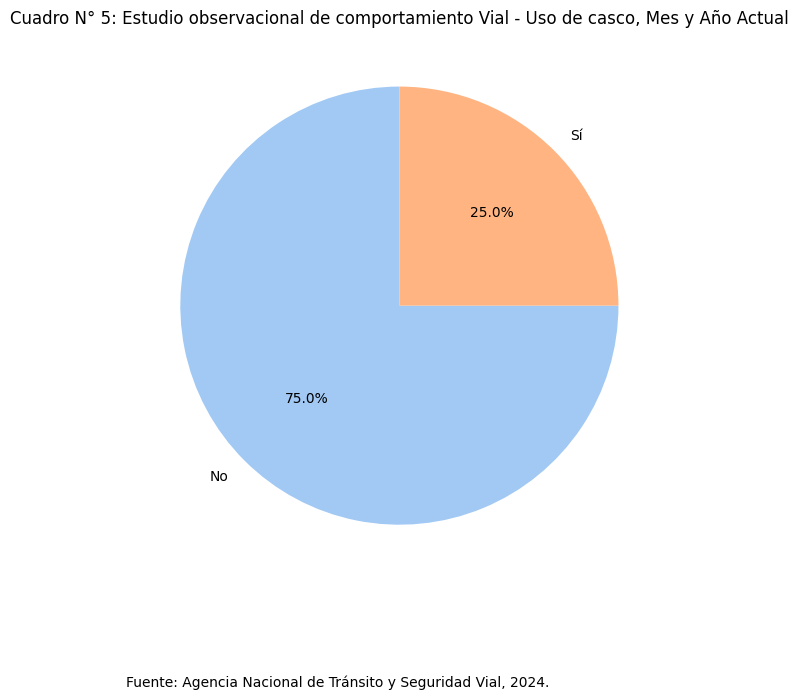

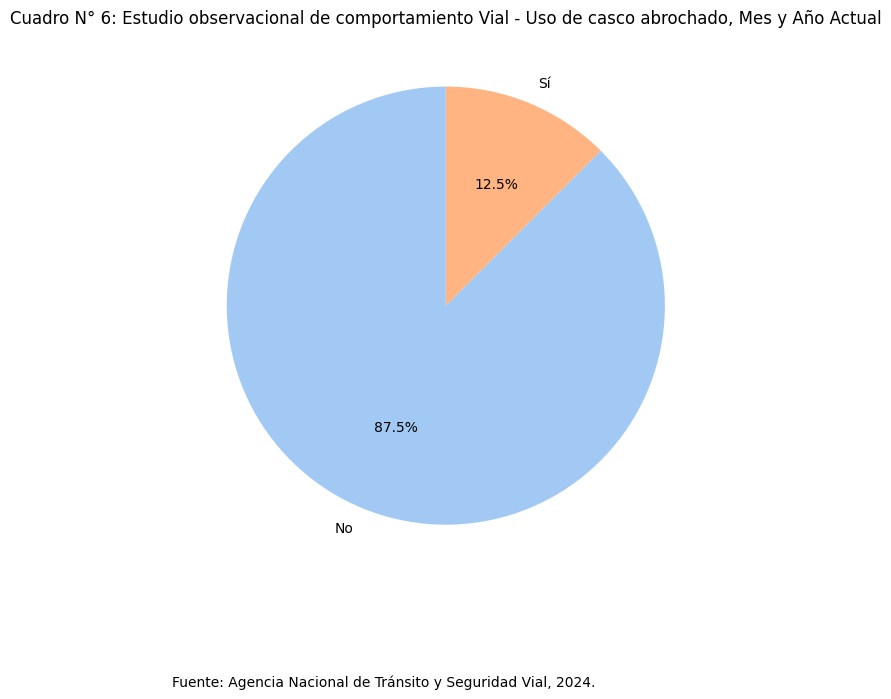

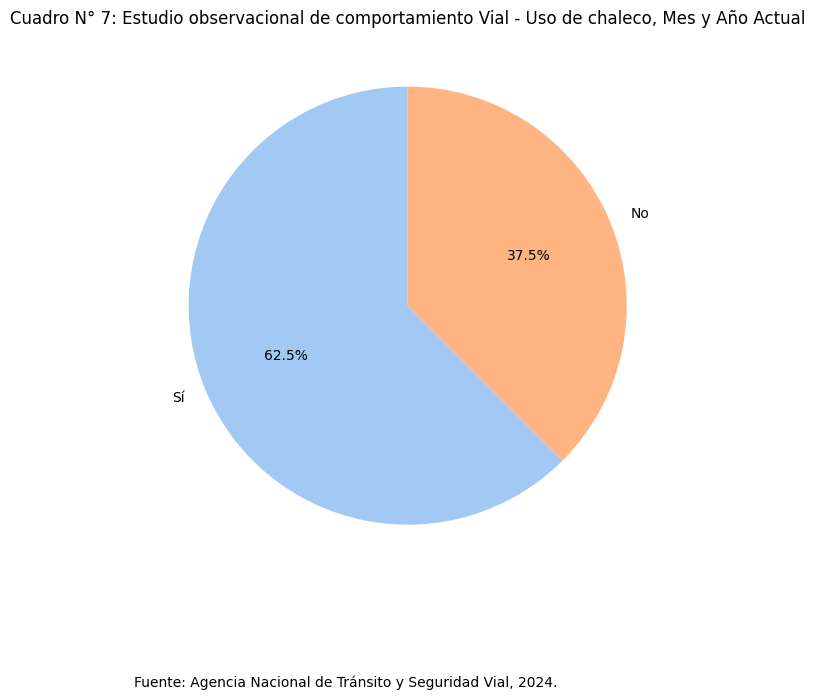

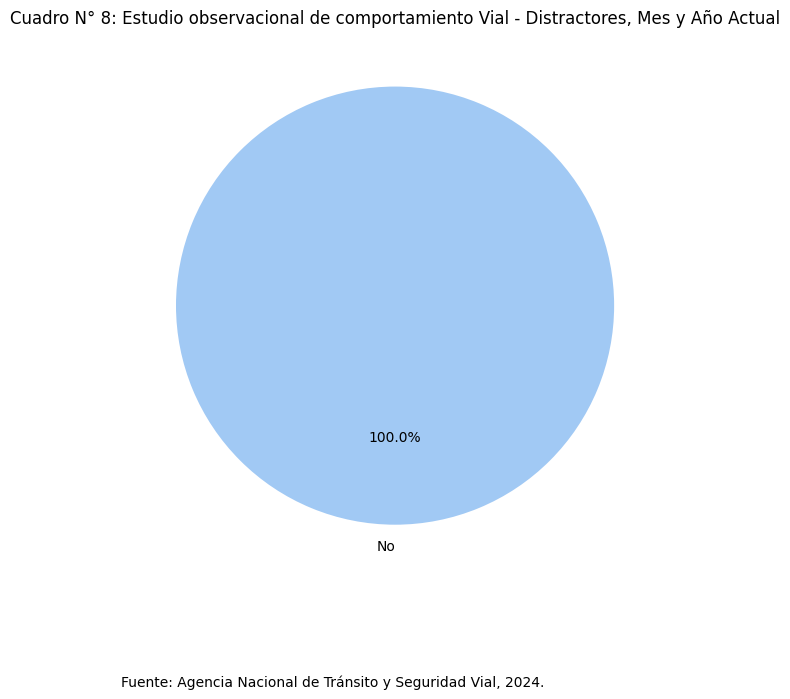

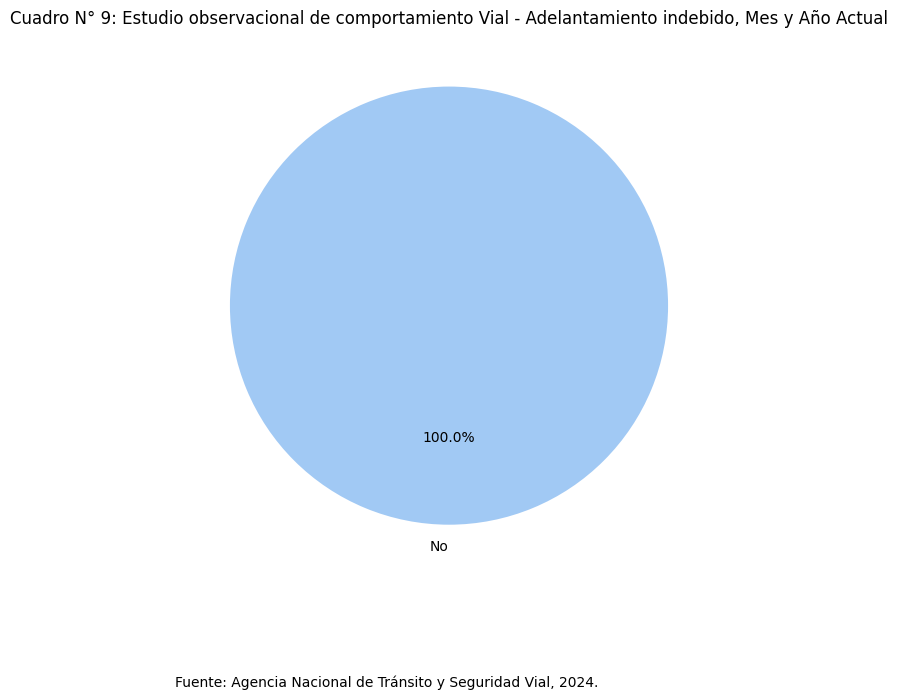

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define la paleta de colores pasteles
colores_pastel = sns.color_palette("pastel")

# Función para generar gráficos de barras
def generar_grafico_barras(data, variable, titulo):
    plt.figure(figsize=(8, 6))
    ax = data[variable].value_counts().plot(kind='bar', color=colores_pastel)
    total = len(data[variable])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_height() + 0.5
        ax.annotate(f'{p.get_height()} ({percentage})', (x, y))
    plt.title(titulo)
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.gca().yaxis.grid(True, linestyle='--')
    plt.gca().set_axisbelow(True)
    plt.text(0, -0.2, 'Fuente: Agencia Nacional de Tránsito y Seguridad Vial, 2024.', horizontalalignment='left',
             verticalalignment='bottom', transform=ax.transAxes)
    plt.show()

# Función para generar gráficos de torta
def generar_grafico_torta(data, variable, titulo):
    plt.figure(figsize=(8, 6))
    ax = data[variable].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colores_pastel, startangle=90)
    plt.title(titulo)
    plt.ylabel('')
    plt.tight_layout()
    plt.text(0, -0.2, 'Fuente: Agencia Nacional de Tránsito y Seguridad Vial, 2024.', horizontalalignment='left',
             verticalalignment='bottom', transform=ax.transAxes)
    plt.show()

# Ejemplo de uso
# Suponiendo que 'data' es tu DataFrame con los resultados y 'variable_interes' es la variable de interés para el título
cuadro_numero = 1
titulo = f'Cuadro N° {cuadro_numero}: Estudio observacional de comportamiento Vial - Ocupante, Mes y Año Actual'
generar_grafico_barras(resultados, 'Ocupante', titulo)

cuadro_numero += 1
titulo = f'Cuadro N° {cuadro_numero}: Estudio observacional de comportamiento Vial - Grupo de Edad, Mes y Año Actual'
generar_grafico_barras(resultados, 'Grupo etario', titulo)

cuadro_numero += 1
titulo = f'Cuadro N° {cuadro_numero}: Estudio observacional de comportamiento Vial - Tipo de Vehículo, Mes y Año Actual'
generar_grafico_barras(resultados, 'Tipo de vehículo', titulo)

# Para las variables restantes
variables_torta = ['Sexo', 'Uso de casco', 'Uso de casco abrochado', 'Uso de chaleco', 'Distractores', 'Adelantamiento indebido']
for variable in variables_torta:
    cuadro_numero += 1
    titulo = f'Cuadro N° {cuadro_numero}: Estudio observacional de comportamiento Vial - {variable}, Mes y Año Actual'
    generar_grafico_torta(data=resultados, variable=variable, titulo=titulo)
